# SYDE 556/750 --- Assignment 3

**Student ID: 20772297**

_Note:_ Please include your numerical student ID only, do _not_ include your name.

_Note:_ Refer to the [PDF](https://github.com/tcstewar/syde556-f21/raw/master/assignments/assignment_03/syde556_assignment_03.pdf) for the full instructions (including some hints), this notebook contains abbreviated instructions only. Cells you need to fill out are marked with a "writing hand" symbol. Of course, you can add new cells in between the instructions, but please leave the instructions intact to facilitate marking.


In [2]:
# Import numpy and matplotlib -- you shouldn't need any other libraries
import numpy as np
import matplotlib.pyplot as plt

# Fix the numpy random seed for reproducible results
np.random.seed(18945)

# Some formating options
%config InlineBackend.figure_formats = ['svg']

# 1. Decoding from a population

**a) Tuning curves.** Plot the tuning curves (firing rate of each neuron for different $x$ values between $-2$ and $2$).


c:\Users\joshzwiebel\miniconda3\envs\syde556\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


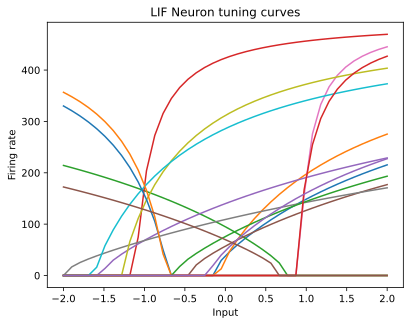

In [3]:
def LIF_firing_rate(J,tref=0.002,trc=0.02):
    return np.where(J>1,1/(tref - trc*np.log(1-1/J)),0)


def generate_activity_lif(num_neurons,num_samples,firing=LIF_firing_rate,tref=0.002,trc=0.02):
    x = np.array([np.linspace(-2, 2,num_samples) for i in range(num_neurons)])
    a_max = np.random.uniform(100, 200,num_neurons)
    zeta = np.random.uniform(-2, 2,num_neurons)
    e = np.random.choice([-1, 1],num_neurons)
    q = (1-np.exp((tref*a_max -1)/(a_max*trc)))**-1 -1
    alpha = q / (1- zeta)
    J_bias = 1 - zeta*q/(1 - zeta)
    encoded_x = x*e.reshape(num_neurons,1)
    A_x = firing(alpha.reshape(num_neurons,1)*encoded_x+ J_bias.reshape(num_neurons,1))
    return A_x, x[0]
def q1_a():
    A_x,X = generate_activity_lif(16,40)
    plt.plot(X,A_x.T)
    plt.title('LIF Neuron tuning curves')
    plt.xlabel('Input')
    plt.ylabel('Firing rate')
q1_a()

**b) Decoder and error computation.** Compute the decoders and plot $(x-\hat{x})$. When computing decoders, take into account noise ($\sigma=0.1 \cdot 200\,\mathrm{Hz}$). When computing $\hat{x}$, add random Gaussian noise with $\sigma=0.1 \cdot 200\,\mathrm{Hz}$ to the activity. Report the Root Mean-Squared Error (RMSE).


c:\Users\joshzwiebel\miniconda3\envs\syde556\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


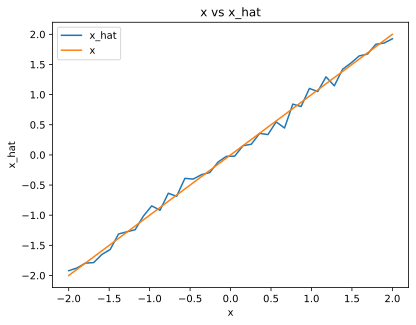

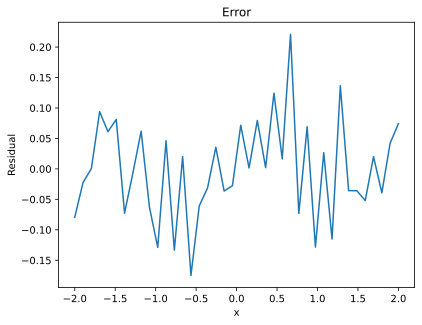

RMSE= 0.08127580349611616


In [4]:
def make_noisy(A_no_noise, factor=0.2):
    sigma = 0.1*200#factor*np.max(A_no_noise)
    noise = np.random.normal(0,sigma,A_no_noise.shape)
    A_noise = np.array(A_no_noise)+noise
    return np.array(A_noise)
def compute_decoder_noise(A,X,factor=0.2): #TODO MAKE SENSE OF ADD NOISE change
    sigma = 0.1*200#factor*np.max(A)
    X = np.array(X) # d x N array
    D_account = np.linalg.lstsq(
    A @ A.T + 0.5 * 40 * np.square(sigma) * np.eye(A.shape[0]), A @ X.T,
    rcond=None)[0].T
    return D_account, A
def plot_errors_and_rmse(D,A_x,X_in):
    x_hat = np.dot(D,A_x)
    plt.plot(X_in,x_hat)
    plt.plot(X_in,X_in)
    plt.legend(['x_hat','x'],loc='upper left')
    plt.xlabel('x')
    plt.ylabel('x_hat')
    plt.title('x vs x_hat')
    plt.show()
    plt.plot(X_in,X_in - x_hat)
    plt.xlabel('x')
    plt.ylabel('Residual')
    plt.title('Error')
    plt.show()
    print('RMSE=',np.sqrt(np.mean((X_in-x_hat)**2)))

def q1_b():
    A_x,X = generate_activity_lif(16,40)
    A_x = make_noisy(A_x)
    D,A = compute_decoder_noise(A_x,X)
    plot_errors_and_rmse(D,A_x,X)
q1_b()

# 2. Decoding from two spiking neurons

**a) Synaptic filter.** Plot the post-synaptic current
$$
			h(t)= \begin{cases}
				0 & \text{if } t < 0 \,, \\
				\frac{e^{-t/\tau}}{\int_0^\infty e^{-t'/\tau} \mathrm{d}t'} & \text{otherwise} \,.
			\end{cases}
		$$


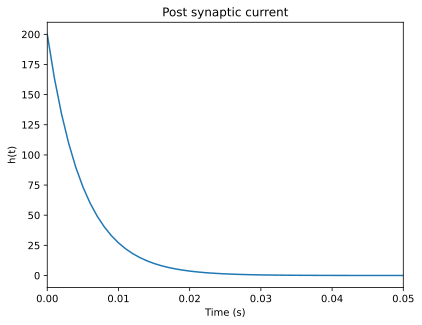

In [5]:
def post_synaptic_current(t,tau=5e-3):
    return np.where(t<0,0,np.exp(-t/tau)/tau)
def q1_c():
    t = np.arange(0,0.1,1e-3)
    
    plt.plot(t,post_synaptic_current(t))
    plt.xlim(0,0.05)
    plt.xlabel('Time (s)')
    plt.ylabel('h(t)')
    plt.title('Post synaptic current')
q1_c()


**b) Decoding using a synaptic filter.** Plot the original signal $x(t)$, the spikes, and the decoded $\hat{x}(t)$ all on the same graph.


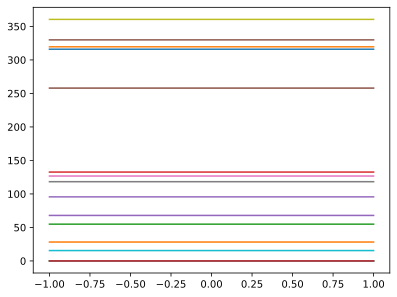

In [6]:

def generate_activity_lif1(num_neurons,num_samples,firing=LIF_firing_rate,tref=0.002,trc=0.02):
    x = np.array([np.zeros(num_samples,) for i in range(num_neurons)])
    a_max = np.random.uniform(100, 200,num_neurons)
    zeta = np.random.uniform(-2, 2,num_neurons)
    e = np.random.choice([-1, 1],num_neurons)
    q = (1-np.exp((tref*a_max -1)/(a_max*trc)))**-1 -1
    alpha = q / (1- zeta)
    J_bias = 1 - zeta*q/(1 - zeta)
    encoded_x = x*e.reshape(num_neurons,1)
    A_x = firing(alpha.reshape(num_neurons,1)*encoded_x+ J_bias.reshape(num_neurons,1))
    if A_x[0][0]>20 and A_x[0][0]<50:
        print(J_bias[0],alpha[0])
    return A_x, x[0]
A_x,X = generate_activity_lif1(16,40)
plt.plot(np.linspace(-1,1,40),A_x.T)

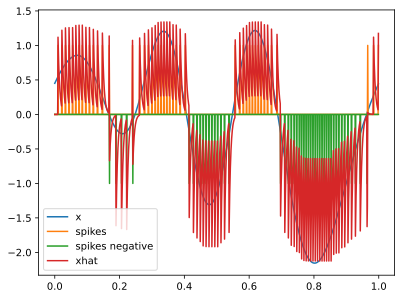

In [9]:
def LIF_firing_rate(J,tref=0.002,trc=0.02):
    return np.where(J>1,1/(tref - trc*np.log(1-1/J)),0)
def J_b_alpha():
    J_bias,alpha = 1.4823440869783115, 2.1885096685451098 #found good values
    return J_bias,alpha

def get_spikes_specific_neuron(x_input, dt=0.001, t0=0, tf=1,trc=0.02,tref=0.002,xmin=40,xmax=150,e=1):
    t = np.arange(t0, tf, dt)
    #TODO CHECK THESE VALUES MAKE SENSE
    J_bias =1.4823# (1 - np.exp((tref*xmin - 1)/(trc*xmin)))**-1
    alpha = 2.1885# (1 - np.exp((tref*xmax - 1)/(trc*xmax)))**-1 - J_bias
    J_vals = alpha*x_input*e + J_bias


    volts = np.zeros(len(x_input))
    rasterplot = np.zeros(len(x_input))
    wait = 0
    for i,J  in enumerate(J_vals):
        if i == 0:
            volts[i] = 0 + dt*(J - 0)/trc
        elif wait>0:
            volts[i] = 0
            wait-=1
        elif volts[i-1] > 1:
            volts[i] = 0
            rasterplot[i] = 1
            wait = 2
        elif volts[i-1] < 0:
            volts[i] = 0
        else:
            volts[i] = volts[i-1] + dt*(J - volts[i-1])/trc if volts[i-1] + dt*(J - volts[i-1])/trc>0 else 0
        
    return t, x_input , rasterplot , volts

def generate_signal(T, dt, rms, limit, seed):
    np.random.seed(seed)
    N = int(T/dt)
    t = np.arange(N)*dt
    fs = np.fft.fftshift(np.fft.fftfreq(N, dt))
    t_signal_x = np.random.normal(0, 1, N)
    f_signal_X = np.fft.fft(t_signal_x)
    f_signal_X = np.fft.fftshift(f_signal_X)
    f_signal_X[np.abs(fs) > limit] = 0
    t_signal_x = np.real(np.fft.ifft(np.fft.ifftshift(f_signal_X)))
    old_rms = np.sqrt(np.mean(t_signal_x**2))
    t_signal_x = t_signal_x*rms/old_rms
    f_signal_X = f_signal_X*rms/old_rms
    return t, t_signal_x, fs, f_signal_X

def compute_decoder(A, X):
    D = np.linalg.lstsq(A.T, X.T, rcond=None)[0].T
    return D, A
def convolution(x,h):
    N = len(x)
    M = len(h)
    y = np.zeros(N)
    for i in range(N):
        for j in range(M):
            if i-j >=0:
                y[i] += x[i-j]*h[j]
    return y
def q2_b():
    t, t_signal_x, fs, f_signal_X = generate_signal(1, 1e-3, 1, 5, 10)
    t,x,spikes,_ = get_spikes_specific_neuron(t_signal_x)
    t1,x1,spikes_negative_enc,_ = get_spikes_specific_neuron(t_signal_x,e=-1)
    h = post_synaptic_current(np.arange(0,1,0.001))
    A = convolution(spikes,h)
    A_1 = convolution(spikes_negative_enc,h)
    A_both = np.vstack((A,A_1))
    D, A = compute_decoder(A_both, t_signal_x)
    xhat = np.dot(D,A)
    plt.plot(t,x)
    plt.plot(t,spikes)
    plt.plot(t1,-spikes_negative_enc)
    plt.plot(t,xhat)
    plt.legend(['x','spikes','spikes negative','xhat'])

q2_b()



**c) Error analysis.** Compute the RMSE of the decoding.


In [8]:
a
def q2_c():
    t, t_signal_x, fs, f_signal_X = generate_signal(1, 1e-3, 1, 5, 10)
    t,x,spikes,_ = get_spikes_specific_neuron(t_signal_x)
    t1,x1,spikes_negative_enc,_ = get_spikes_specific_neuron(t_signal_x,e=-1)
    h = post_synaptic_current(np.arange(0,1,0.001))
    A = convolution(spikes,h)
    A_1 = convolution(spikes_negative_enc,h)
    A_both = np.vstack((A,A_1))
    D, A = compute_decoder(A_both, t_signal_x)
    xhat = np.dot(D,A)
    print('RMSE=',np.sqrt(np.mean((t_signal_x-xhat)**2)))

q2_c()
    

NameError: name 'a' is not defined

# 3. Decoding from many neurons

**a) Exploring the error for an increasing neuron count.** Plot the Root Mean-Squared Error as the number of neurons increases, on a log-log plot. Try $8$ neurons, $16$ neurons, $32$, $64$, $128$, up to $256$. For the RMSE for a particular number of neurons, average over at least $5$ randomly generated groups of neurons. For each group of neurons, randomly generate the signal $x(t)$. Use the same parameters as in question 2.


In [ ]:
# def get_spikes_random_neuron(x_input,num_neurons, dt=0.001, t0=0, tf=1,trc=0.02,tref=0.002,e=1):
#     t = np.arange(t0, tf, dt)
#     a_max = np.random.uniform(100, 200,(num_neurons,1))
#     zeta = np.random.uniform(-2, 2,(num_neurons,1))
#     e = np.random.choice([-1, 1],(num_neurons,1))
#     q = (1-np.exp((tref*a_max -1)/(a_max*trc)))**-1 -1
#     alpha = q / (1- zeta)
#     J_bias = 1 - zeta*q/(1 - zeta)
#     J_vals = alpha.reshape(num_neurons,1)*x_input*e.reshape(num_neurons,1) + J_bias
#     print(J_vals.shape)
#     volts = np.zeros(J_vals.shape)
#     rasterplot = np.zeros(len(x_input))
#     wait = 0
#     for i,J  in enumerate(J_vals):
#         if i == 0:
#             volts[i] = 0 + dt*(J - 0)/trc
#         # elif wait>0:
#         #     volts[i] = 0
#         #     wait-=1
#         # elif volts[i-1] > 1:
#         #     volts[i] = 0
#         #     rasterplot[i] = 1
#         #     wait = 2
#         # elif volts[i-1] < 0:
#         #     volts[i] = 0
#         else:
#             volts[i] = volts[i-1] + dt*(J - volts[i-1])/trc# if volts[i-1] + dt*(J - volts[i-1])/trc>0 else 0
#         # volts[i] = np.where(volts[i]>1,1,volts[i])
        
#     return t, x_input , rasterplot , volts

def get_spikes_random_neuron(x_input,num_neurons, dt=0.001, t0=0, tf=1,trc=0.02,tref=0.002,e=1):
    t = np.arange(t0, tf, dt)
    a_max = np.random.uniform(100, 200,1)
    zeta = np.random.uniform(-2, 2,1)
    e = np.random.choice([-1, 1],1)
    q = (1-np.exp((tref*a_max -1)/(a_max*trc)))**-1 -1
    alpha = q / (1- zeta)
    J_bias = 1 - zeta*q/(1 - zeta)
    J_vals = alpha*x_input*e + J_bias
    volts = np.zeros(J_vals.shape)
    rasterplot = np.zeros(len(x_input))
    wait = 0
    for i,J  in enumerate(J_vals):
        if i == 0:
            volts[i] = 0 + dt*(J - 0)/trc
        elif wait>0:
            volts[i] = 0
            wait-=1
        elif volts[i-1] > 1:
            volts[i] = 0
            rasterplot[i] = 1
            wait = 2
        elif volts[i-1] < 0:
            volts[i] = 0
        else:
            volts[i] = volts[i-1] + dt*(J - volts[i-1])/trc# if volts[i-1] + dt*(J - volts[i-1])/trc>0 else 0
        
    return t, x_input , rasterplot , volts

def q3_a():
    t, t_signal_x, fs, f_signal_X = generate_signal(1, 1e-3, 1, 5, 10)
    rmse = []
    temp_rmse = []
    neurons = [8,16,32,64,128,256]
 

    for num_neurons in neurons:
        for i in range(5):
            total_spikes = np.zeros((num_neurons,1000))
            temp_rmse = []
            t, t_signal_x, fs, f_signal_X = generate_signal(1, 1e-3, 1, 5, 10)
            # t_signal_x = np.tile(t_signal_x,(num_neurons,1))
            total_spikes = np.array([get_spikes_random_neuron(t_signal_x,num_neurons)[2] for i in range(num_neurons)])
            h = post_synaptic_current(np.arange(0,1,0.001))
            A = np.array([convolution(total_spikes[i],h) for i in range(len(total_spikes))]) #todo check if convolve is before or after
            D, A = compute_decoder(A, t_signal_x)
            xhat = np.dot(D,A)
            temp_rmse.append(np.sqrt(np.mean((t_signal_x-xhat)**2)))
        rmse.append(np.mean(temp_rmse))
        print('RMSE=',np.mean(temp_rmse))
    plt.loglog(neurons,rmse,base=2)
    plt.xlabel('Number of Neurons')
    plt.ylabel('RMSE')
    plt.title('RMSE vs Number of Neurons')
            

            
    
#13 mins to complete

    
q3_a()

**b) Discussion.** Discuss your results. What is the systematic relationship between the neuron count and the error?


The plot is linear on the loglog plot showing how the error decreases proportionally to 1/N

✍ \<YOUR SOLUTION HERE\>


# 4. Connecting two groups of neurons

**a) Computing a function.** Show the behaviour of the system with an input of $x(t)=t-1$ for $1\,\mathrm{s}$ (a linear ramp from $-1$ to $0$). Plot the ideal $x(t)$ and $y(t)$ values, along with $\hat{y}(t)$.


In [ ]:
# ✍ <YOUR SOLUTION HERE>

**b) Step input.** Repeat part (a) with an input that is ten randomly chosen values between -1 and 0, each one held for 0.1 seconds (a randomly varying step input)


In [ ]:
# ✍ <YOUR SOLUTION HERE>

**c) Sinusoidal input.** Repeat part (a) with an input that is $x(t)=0.2\sin(6\pi t)$.


In [ ]:
# ✍ <YOUR SOLUTION HERE>

**d) Discussion.** Briefly discuss the results for this question. Does the output match the ideal output? What kind of deviations do you see and why do those exist?


✍ \<YOUR SOLUTION HERE\>


# 5. Connecting three groups of neurons

**a) Sinusoidal input.** Plot $x(t)$, $y(t)$, the ideal $z(t)$, and the decoded $\hat{z}(t)$ for an input of $x(t)=\cos(3\pi t)$ and $y(t)=0.5 \sin (2 \pi t)$ (over $1\,\mathrm{s}$).


In [ ]:
# ✍ <YOUR SOLUTION HERE>

**b) Random input.** Plot $x(t)$, $y(t)$, the ideal $z(t)$, and the decoded $\hat{z}(t)$ for a random input over $1\,\mathrm{s}$. For $x(t)$ use a random signal with a limit of $8\,\mathrm{Hz}$ and $\mathtt{rms}=1$. For $y(t)$ use a random signal with a limit of $5\,\mathrm{Hz}$ and $\mathtt{rms}=0.5$.


In [ ]:
# ✍ <YOUR SOLUTION HERE>

# 6. Computing with vectors

**a) Constant inputs.** Plot the decoded output $\hat{w}(t)$ and the ideal $w$ for
$$x =(0.5,1), \quad y = (0.1,0.3), \quad z =(0.2,0.1), \quad q = (0.4,-0.2) \,.$$


In [ ]:
# ✍ <YOUR SOLUTION HERE>

**b) Sinusoidal input.** Produce the same plot for
$$x =(0.5,1), \quad y = (\sin(4\pi t),0.3), \quad z =(0.2,0.1), \quad q = (\sin(4\pi t),-0.2) \,.$$


In [ ]:
# ✍ <YOUR SOLUTION HERE>

**c) Discussion.** Describe your results and discuss why and how they stray from the expected answer.


✍ \<YOUR SOLUTION HERE\>
